In [1]:
# add modules folder to Python's search path
import sys
from pathlib import Path
from os.path import dirname, realpath, abspath
script_dir = Path(abspath(''))#Path(dirname(realpath(__file__)))
module_dir = str(script_dir.parent)
sys.path.insert(0, module_dir + '/modules')
print(module_dir)
# import rest of the modules
import ex_data_gen as dg
import cnn
import numpy as np

C:\Users\pinak\Documents\GitHub\1dCNN


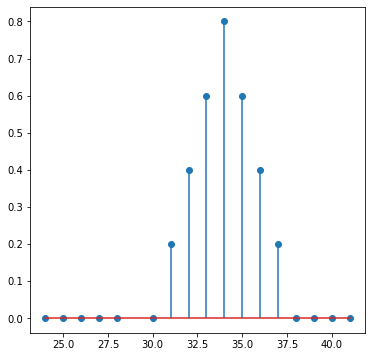

In [2]:
ss = dg.ShapeSeries()
series, _ = ss.gen_shape('triangle')
ss.plot_shape(series)

In [3]:
ss.create_dataset(500, '../data', train=True)
ss.create_dataset(200, '../data', train=False)

In [4]:
nn = cnn.OneDCNN()
x_train = np.load('../data/train_data.npy')
y_train = np.load('../data/train_labels.npy')
x_test = np.load('../data/test_data.npy')
y_test = np.load('../data/test_labels.npy')
print(x_train.shape, y_train.shape)

(500, 100) (500, 4)


In [5]:
print(nn(x_train))

tf.Tensor(
[[0.20945399 0.25965583 0.29574415 0.23514599]
 [0.2523344  0.24276507 0.255477   0.24942356]
 [0.21943335 0.29715917 0.2584325  0.22497495]
 ...
 [0.25258508 0.24903116 0.25075743 0.24762629]
 [0.23416    0.263495   0.27541414 0.22693081]
 [0.2119294  0.26276177 0.25291127 0.27239758]], shape=(500, 4), dtype=float32)


In [6]:
nn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
nn.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
16/16 [==============================] - 1s 44ms/step - loss: 1.3915 - accuracy: 0.2881 - val_loss: 1.3723 - val_accuracy: 0.3250
Epoch 2/10
16/16 [==============================] - 0s 5ms/step - loss: 1.3667 - accuracy: 0.4070 - val_loss: 1.3605 - val_accuracy: 0.4000
Epoch 3/10
16/16 [==============================] - 0s 5ms/step - loss: 1.3498 - accuracy: 0.4687 - val_loss: 1.3408 - val_accuracy: 0.4300
Epoch 4/10
16/16 [==============================] - 0s 5ms/step - loss: 1.3172 - accuracy: 0.5269 - val_loss: 1.3132 - val_accuracy: 0.4350
Epoch 5/10
16/16 [==============================] - 0s 5ms/step - loss: 1.2854 - accuracy: 0.5226 - val_loss: 1.2662 - val_accuracy: 0.5250
Epoch 6/10
16/16 [==============================] - 0s 5ms/step - loss: 1.2235 - accuracy: 0.6072 - val_loss: 1.1984 - val_accuracy: 0.5650
Epoch 7/10
16/16 [==============================] - 0s 5ms/step - loss: 1.1439 - accuracy: 0.6343 - val_loss: 1.1229 - val_accuracy: 0.5600
Epoch 8/10
16/16 [=

In [9]:
ss.dist_to_label(nn.call(series[np.newaxis, :]))

{0: 'rectangle', 1: 'triangle', 2: 'M', 3: 'U'}
1


'triangle'